In [1]:
# Loading the libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import time
import matplotlib.pyplot as plt

2023-12-16 13:34:44.016745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


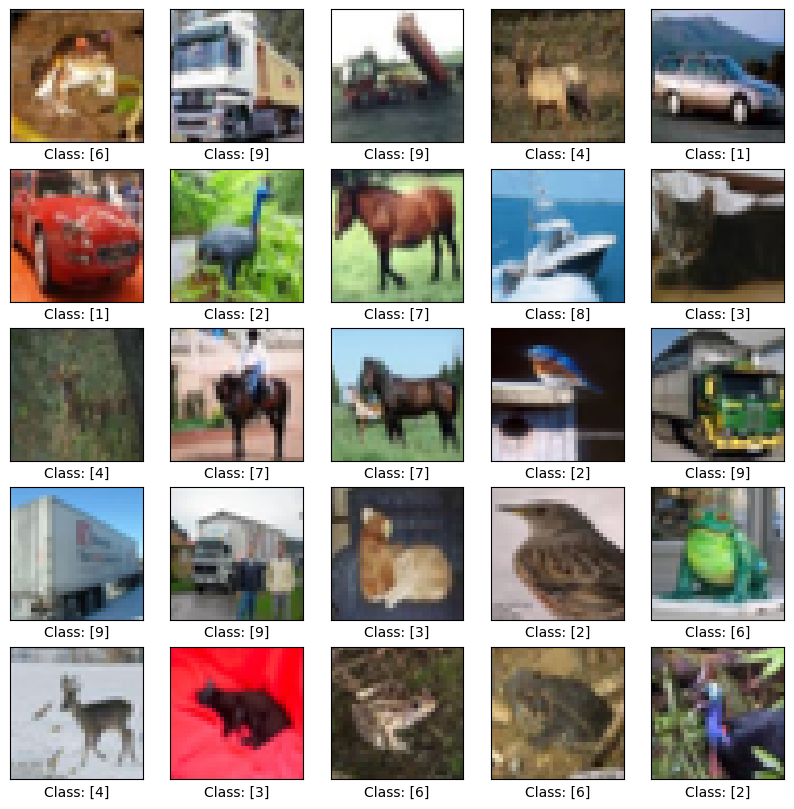

In [2]:
# Load and preprocess data
# The CIFAR-10 dataset is loaded, which contains 60,000 32x32 color images in 10 classes
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values of the images to a range of 0 to 1
# This helps in the convergence of the neural network during training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Preview a sample of the dataset
# Display the first 25 images from the training set along with their class labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel('Class: {}'.format(y_train[i]))
plt.show()

In [3]:
# Define the CNN model
model = Sequential([
    # First convolutional layer with 32 filters of size 3x3
    # 'relu' activation function is used and the input shape is set to (32, 32, 3) for 32x32 RGB images
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

    # First Max Pooling layer with a 2x2 window
    # This helps reduce the spatial dimensions (height and width) of the output volume
    MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters of size 3x3
    # Increasing the number of filters as we go deeper into the network helps the model learn more complex features
    Conv2D(64, (3, 3), activation='relu'),

    # Second Max Pooling layer with a 2x2 window
    MaxPooling2D((2, 2)),

    # Third convolutional layer with 64 filters of size 3x3
    Conv2D(64, (3, 3), activation='relu'),

    # Flatten layer to convert the 3D output to 1D before passing it to the dense layers
    Flatten(),

    # Dense layer with 64 neurons
    # Acts as a fully connected layer for classification
    Dense(64, activation='relu'),

    # Output dense layer with 10 neurons, one for each class
    # Since we use 'from_logits=True' in the loss function, we don’t apply a softmax activation in this layer
    Dense(10)
])

# Additional information about the model can be viewed using model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

2023-12-16 13:34:47.400176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Train the model and measure execution time
start_time = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
end_time = time.time()

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.5278 - accuracy: 0.4410 - val_loss: 1.2575 - val_accuracy: 0.5483
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1577 - accuracy: 0.5893 - val_loss: 1.1020 - val_accuracy: 0.6047
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0170 - accuracy: 0.6432 - val_loss: 0.9807 - val_accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9202 - accuracy: 0.6771 - val_loss: 0.9336 - val_accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8500 - accuracy: 0.7024 - val_loss: 0.9269 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7898 - accuracy: 0.7230 - val_loss: 0.8959 - val_accuracy: 0.6879
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7343 - accuracy: 0.7429 - val_loss: 0.9053 -

In [6]:
# Calculate execution time
execution_time = end_time - start_time

# Get accuracy
accuracy = history.history['accuracy'][-1]

print("Execution Time: ", execution_time)
print("Accuracy: ", accuracy)

Execution Time:  178.12775897979736
Accuracy:  0.7839000225067139
